In [3]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
pip install openpyxl --upgrade

     -------------------------------------- 250.0/250.0 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
df =pd.read_excel(r'data/weld_dataset.xlsx')
df.head()

,Sl.No,Filler Material,Current(A),Travel speed (cm/min),Chromium equivalent,thickness of welding specimen(mm),Feed (m/min),Result of visual inspection,Percentage Elongation,"Tensile strength, Mpa"
0,1,304,80,8.0,18.8,3.000,1.2,No Defects,23.228,420
1,2,304,90,8.5,18.8,2.990,1.4,No Defects,39.216,549
2,3,304,100,9.0,18.8,3.000,1.6,No Defects,37.384,610
3,4,316L,80,8.5,20.361,3.000,1.6,No Defects,15.772,415
4,5,316L,90,9.0,20.361,3.001,1.2,NaN,39.610,596


# EDA by Pandas Profiling


In [9]:
!pip install pandas-profiling

     -------------------------------------- 324.4/324.4 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 344.9/344.9 kB 2.7 MB/s eta 0:00:00
     -------------------------------------- 663.3/663.3 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 62.8/62.8 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 39.8/39.8 MB 2.3 MB/s eta 0:00:00
     -------------------------------------- 133.1/133.1 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 155.4/155.4 kB 2.3 MB/s eta 0:00:00
     -------------------------------------- 296.5/296.5 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 2.1 MB/s eta 0:00:00
     ------------------------------------ 102.7/102.7 kB 848.1 kB/s eta 0:00:00
     ---------------------------------------- 14.7/14.7 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\shaheer\\Desktop\\shaheer\\360_digi_tmg\\PROJECT\\welding\\modelling_welding\\env\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [4]:
import sys
!{sys.executable} -m pip install pandas-profiling

In [5]:
#python -m pip install pandas-profiling

In [6]:
from pandas_profiling import ProfileReport
pf=ProfileReport(df)

In [7]:
pf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [96]:
del df['Sl.No']

In [97]:
df.head()

,Filler Material,Current(A),Travel speed (cm/min),Chromium equivalent,thickness of welding specimen(mm),Feed (m/min),Result of visual inspection,Percentage Elongation,"Tensile strength, Mpa"
0,304,80,8.0,18.8,3.000,1.2,No Defects,23.228,420
1,304,90,8.5,18.8,2.990,1.4,No Defects,39.216,549
2,304,100,9.0,18.8,3.000,1.6,No Defects,37.384,610
3,316L,80,8.5,20.361,3.000,1.6,No Defects,15.772,415
4,316L,90,9.0,20.361,3.001,1.2,NaN,39.610,596


# EDA

# 1.univariate analysis

In [98]:
df.mean()

C:\Users\hp\AppData\Local\Temp/ipykernel_1540/3698961737.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Current(A)                            90.000000
Travel speed (cm/min)                  8.500000
thickness of welding specimen(mm)      2.997889
Feed (m/min)                           1.400000
Percentage Elongation                 29.257556
Tensile strength, Mpa                509.222222
dtype: float64

In [99]:
df.median()

C:\Users\hp\AppData\Local\Temp/ipykernel_1540/530051474.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Current(A)                            90.000
Travel speed (cm/min)                  8.500
Chromium equivalent                   20.361
thickness of welding specimen(mm)      3.000
Feed (m/min)                           1.400
Percentage Elongation                 28.780
Tensile strength, Mpa                530.000
dtype: float64

In [100]:
vp=df.var()



C:\Users\hp\AppData\Local\Temp/ipykernel_1540/1793869439.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [101]:
vp

Current(A)                             75.000000
Travel speed (cm/min)                   0.187500
thickness of welding specimen(mm)       0.000020
Feed (m/min)                            0.030000
Percentage Elongation                  86.765648
Tensile strength, Mpa                5135.944444
dtype: float64

In [102]:
df.std()


C:\Users\hp\AppData\Local\Temp/ipykernel_1540/3971434360.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Current(A)                            8.660254
Travel speed (cm/min)                 0.433013
thickness of welding specimen(mm)     0.004485
Feed (m/min)                          0.173205
Percentage Elongation                 9.314808
Tensile strength, Mpa                71.665504
dtype: float64

In [103]:
df.describe(include='all')

,Filler Material,Current(A),Travel speed (cm/min),Chromium equivalent,thickness of welding specimen(mm),Feed (m/min),Result of visual inspection,Percentage Elongation,"Tensile strength, Mpa"
count,9.0,9.000000,9.000000,9.0,9.000000,9.000000,8,9.000000,9.000000
unique,3.0,NaN,NaN,3.0,NaN,NaN,3,NaN,NaN
top,304.0,NaN,NaN,18.8,NaN,NaN,No Defects,NaN,NaN
freq,3.0,NaN,NaN,3.0,NaN,NaN,6,NaN,NaN
mean,NaN,90.000000,8.500000,NaN,2.997889,1.400000,NaN,29.257556,509.222222
std,NaN,8.660254,0.433013,NaN,0.004485,0.173205,NaN,9.314808,71.665504
min,NaN,80.000000,8.000000,NaN,2.990000,1.200000,NaN,15.772000,415.000000
25%,NaN,80.000000,8.000000,NaN,3.000000,1.200000,NaN,21.648000,459.000000
50%,NaN,90.000000,8.500000,NaN,3.000000,1.400000,NaN,28.780000,530.000000
75%,NaN,100.000000,9.000000,NaN,3.000000,1.600000,NaN,37.384000,549.000000


In [104]:
#since the std deviation of thickness of welding specimen(mm) is nearer to zero, so we wac drop that column

In [105]:
del df['thickness of welding specimen(mm)']

In [106]:
df.head()

,Filler Material,Current(A),Travel speed (cm/min),Chromium equivalent,Feed (m/min),Result of visual inspection,Percentage Elongation,"Tensile strength, Mpa"
0,304,80,8.0,18.8,1.2,No Defects,23.228,420
1,304,90,8.5,18.8,1.4,No Defects,39.216,549
2,304,100,9.0,18.8,1.6,No Defects,37.384,610
3,316L,80,8.5,20.361,1.6,No Defects,15.772,415
4,316L,90,9.0,20.361,1.2,NaN,39.610,596


In [107]:
df.shape

(9, 8)

In [108]:
df.columns =['fm', 'ca', 'ts', 'ce','fd','rvi','pe','tsm']

In [109]:
df.head()

,fm,ca,ts,ce,fd,rvi,pe,tsm
0,304,80,8.0,18.8,1.2,No Defects,23.228,420
1,304,90,8.5,18.8,1.4,No Defects,39.216,549
2,304,100,9.0,18.8,1.6,No Defects,37.384,610
3,316L,80,8.5,20.361,1.6,No Defects,15.772,415
4,316L,90,9.0,20.361,1.2,NaN,39.610,596


In [110]:
df.isnull()


,fm,ca,ts,ce,fd,rvi,pe,tsm
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False


In [111]:
 df.isnull().sum()

fm     0
ca     0
ts     0
ce     0
fd     0
rvi    1
pe     0
tsm    0
dtype: int64

In [112]:
#there is missing values in rvi. that is "result of visual inspection". which is categorical. so we do mode imputation

In [113]:
from sklearn.impute import SimpleImputer

In [114]:
df['rvi'] = df['rvi'].fillna(df['rvi'].mode()[0])

In [115]:
df

,fm,ca,ts,ce,fd,rvi,pe,tsm
0,304,80,8.0,18.8,1.2,No Defects,23.228,420
1,304,90,8.5,18.8,1.4,No Defects,39.216,549
2,304,100,9.0,18.8,1.6,No Defects,37.384,610
3,316L,80,8.5,20.361,1.6,No Defects,15.772,415
4,316L,90,9.0,20.361,1.2,No Defects,39.610,596
5,316L,100,8.0,20.361,1.4,Excessive Deposition,21.648,471
6,309L,80,9.0,24.9,1.4,Lack Of Fusion Of Hsla Steel,28.780,530
7,309L,90,8.0,24.9,1.6,No Defects,37.356,533
8,309L,100,8.5,24.9,1.2,No Defects,20.324,459


In [116]:
df.describe()

,ca,ts,fd,pe,tsm
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,90.000000,8.500000,1.400000,29.257556,509.222222
std,8.660254,0.433013,0.173205,9.314808,71.665504
min,80.000000,8.000000,1.200000,15.772000,415.000000
25%,80.000000,8.000000,1.200000,21.648000,459.000000
50%,90.000000,8.500000,1.400000,28.780000,530.000000
75%,100.000000,9.000000,1.600000,37.384000,549.000000
max,100.000000,9.000000,1.600000,39.610000,610.000000


In [117]:
#another method for missing values imputation 
from sklearn.impute import SimpleImputer
import numpy as np
 

mode_imputer= SimpleImputer(missing_values=np.nan, strategy='most_frequent')


df.rvi=pd.DataFrame(mode_imputer.fit_transform(df[['rvi']]))
df.rvi.isna().sum() 

0

In [118]:
# skewness,kurtosis,barplot and histogram
df.skew()




C:\Users\hp\AppData\Local\Temp/ipykernel_1540/2976628713.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



ca     0.000000
ts     0.000000
ce     0.629147
fd     0.000000
pe    -0.131347
tsm    0.014441
dtype: float64

In [119]:
df.kurt()

C:\Users\hp\AppData\Local\Temp/ipykernel_1540/1257127604.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



ca    -1.714286
ts    -1.714286
ce    -1.714286
fd    -1.714286
pe    -1.934914
tsm   -1.387485
dtype: float64

In [120]:
EDA ={"column ": df.columns,
      "mean": df.mean(),
      "median":df.median(),
      "mode":df.mode(),
      "standard deviation": df.std(),
      "variance":df.var(),
      "skewness":df.skew(),
      "kurtosis":df.kurt()}

EDA


C:\Users\hp\AppData\Local\Temp/ipykernel_1540/1694570006.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\hp\AppData\Local\Temp/ipykernel_1540/1694570006.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\algorithms.py:969: UserWarning:

Unable to sort modes: '<' not supported between instances of 'str' and 'int'

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\algorithms.py:969: UserWarning:

Unable to sort modes: '<' not supported between instances of 'str' and 'float'

C:\Users\hp\AppData\Local\Temp/ipykernel_1540/1694570006.py:5: FutureWarning:

Dropping of nuisance columns in Dat

{'column ': Index(['fm', 'ca', 'ts', 'ce', 'fd', 'rvi', 'pe', 'tsm'], dtype='object'),
 'mean': ca      90.000000
 ts       8.500000
 fd       1.400000
 pe      29.257556
 tsm    509.222222
 dtype: float64,
 'median': ca      90.000
 ts       8.500
 ce      20.361
 fd       1.400
 pe      28.780
 tsm    530.000
 dtype: float64,
 'mode':      fm     ca   ts       ce   fd         rvi      pe  tsm
 0   304   80.0  8.0     18.8  1.2  No Defects  15.772  415
 1  316L   90.0  8.5   20.361  1.4         NaN  20.324  420
 2  309L  100.0  9.0     24.9  1.6         NaN  21.648  459
 3   NaN    NaN  NaN      NaN  NaN         NaN  23.228  471
 4   NaN    NaN  NaN      NaN  NaN         NaN  28.780  530
 5   NaN    NaN  NaN      NaN  NaN         NaN  37.356  533
 6   NaN    NaN  NaN      NaN  NaN         NaN  37.384  549
 7   NaN    NaN  NaN      NaN  NaN         NaN  39.216  596
 8   NaN    NaN  NaN      NaN  NaN         NaN  39.610  610,
 'standard deviation': ca      8.660254
 ts      0.433013
 fd

In [121]:
import numpy as np
df.shape

import matplotlib.pyplot as plt

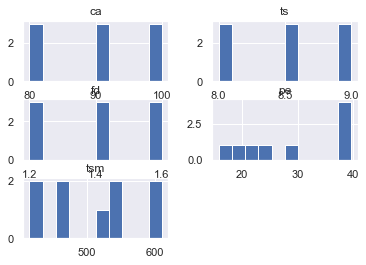

In [122]:
hist = df.hist()

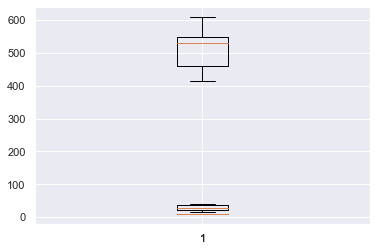

In [123]:
# box plot
plt.boxplot(df.ts)
plt.boxplot(df.pe)
plt.boxplot(df.tsm)
plt.show()


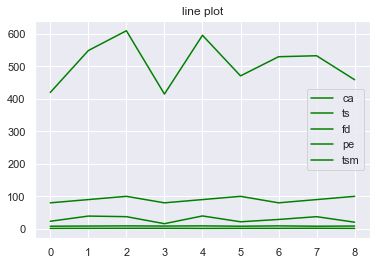

In [124]:
df.plot(kind='line',color='green',title='line plot')
plt.show()


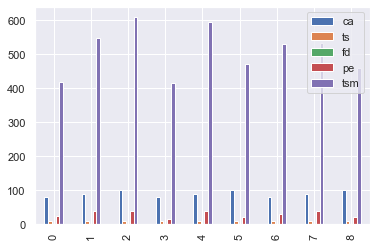

In [125]:
df.plot(kind='bar')
plt.show()


In [126]:
#df.iplot()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



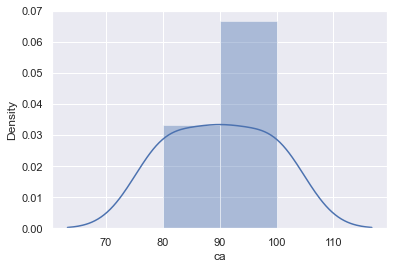

In [127]:
sns.distplot(df.ca)
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



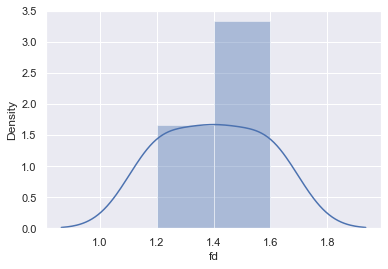

In [128]:
sns.distplot(df.fd)
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



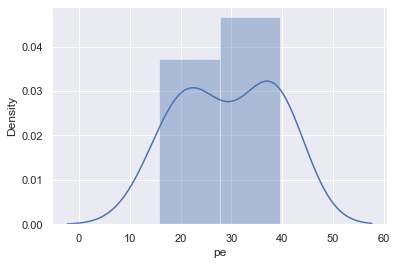

In [129]:
sns.distplot(df.pe)
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='ts', ylabel='Density'>

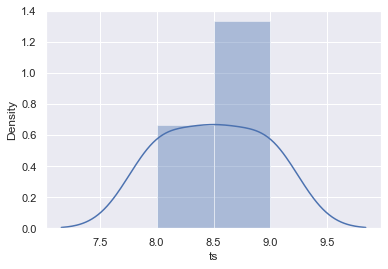

In [130]:
sns.distplot(df.ts)

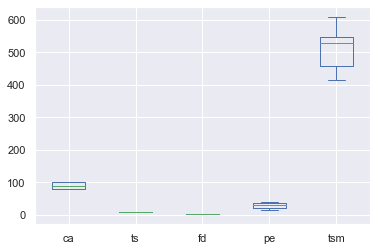

In [131]:
df.plot(kind='box') ;plt.show()


In [132]:
#!pip install plotly


In [133]:
import plotly as py

In [134]:
from plotly.offline import iplot

In [135]:

import plotly.tools as tls

In [136]:
#df.iplot(kind='box')

In [137]:
df.columns

Index(['fm', 'ca', 'ts', 'ce', 'fd', 'rvi', 'pe', 'tsm'], dtype='object')

In [138]:
import seaborn as sns
#sns.boxplot(df.fm)


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



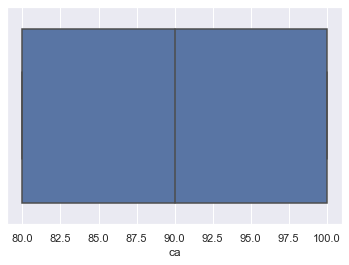

In [139]:
sns.boxplot(df.ca);plt.show()



C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



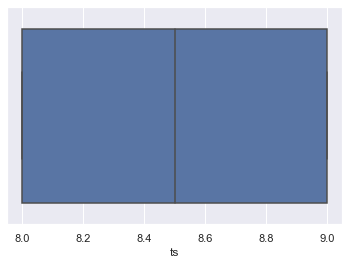

In [140]:
sns.boxplot(df.ts)
plt.show()

In [141]:
#sns.boxplot(df.ce)


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



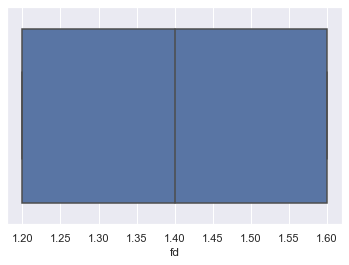

In [142]:
sns.boxplot(df.fd)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



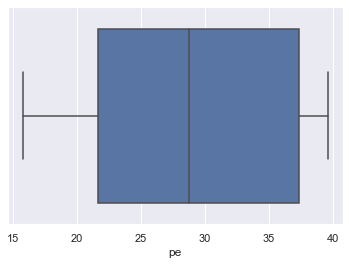

In [143]:
sns.boxplot(df.pe)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



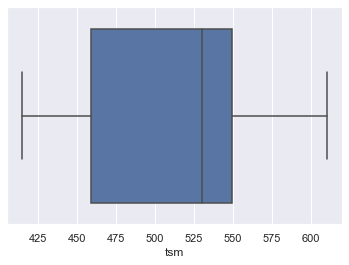

In [144]:
sns.boxplot(df.tsm)
plt.show()

In [145]:
df1=df.iloc[:,[1,2,3,4,6,7]]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\hp\anaconda3\lib\site-packages\seabor

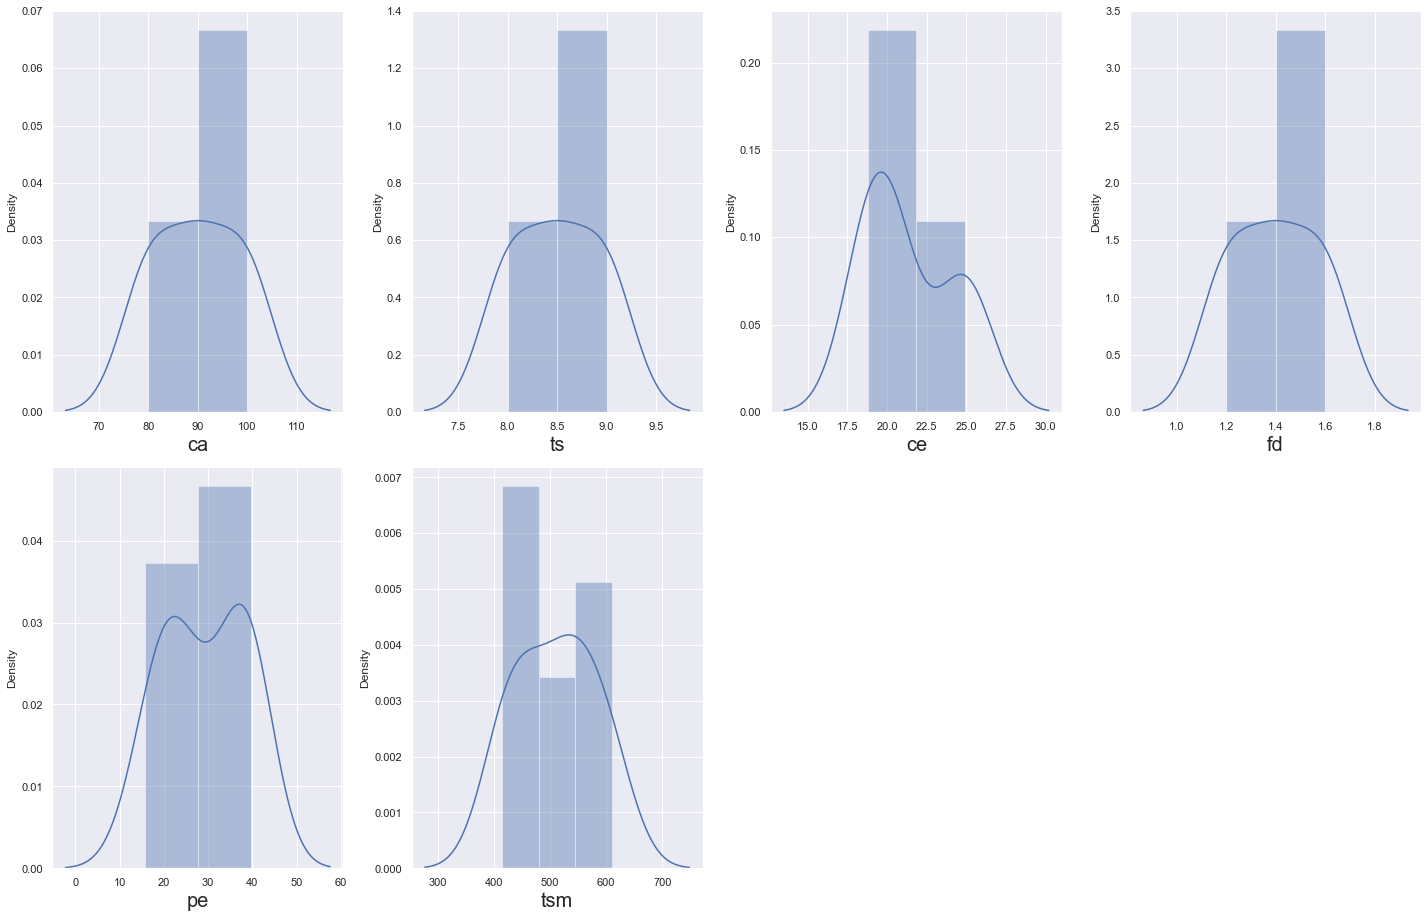

In [146]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Data preprocessing

<AxesSubplot:>

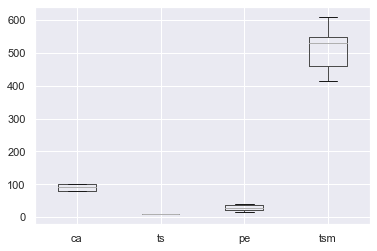

In [147]:
### to checkmoutliers

df.boxplot(column = ['ca', 'ts', 'pe', 'tsm'])


In [148]:
"""since there is no outliers, winsorization not required

#winsorization using guassian 
winsor=Winsorizer(capping_method='guassian',
                     tail='both',
                     fold=1.5,
                     variables=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv'])
bostmantf=winsor.fit_transform(bostman[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']])"""


"since there is no outliers, winsorization not required\n\n#winsorization using guassian \nwinsor=Winsorizer(capping_method='guassian',\n                     tail='both',\n                     fold=1.5,\n                     variables=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv'])\nbostmantf=winsor.fit_transform(bostman[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']])"

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='tsm', ylabel='count'>

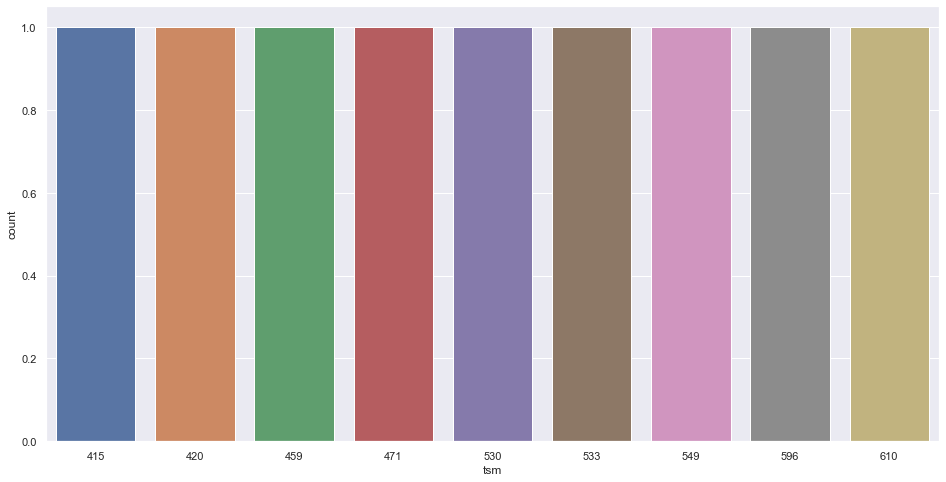

In [149]:
# Countplot
plt.figure(1, figsize=(16, 8))
sns.countplot(df['tsm'])



In [150]:
qqc=['ca','ts','fd','pe','tsm']

In [151]:
from statsmodels.graphics.gofplots import qqplot
from scipy import stats

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

C:\Users\hp\anaconda3\lib\site-packages\

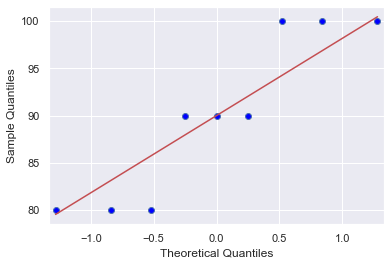

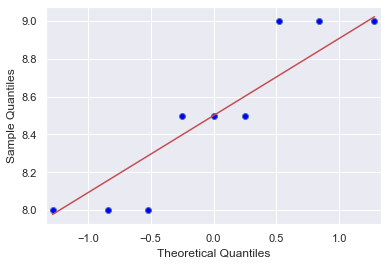

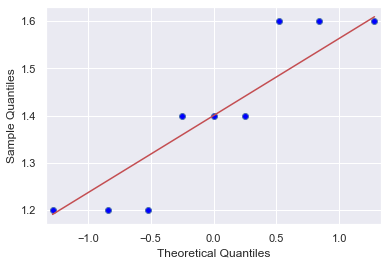

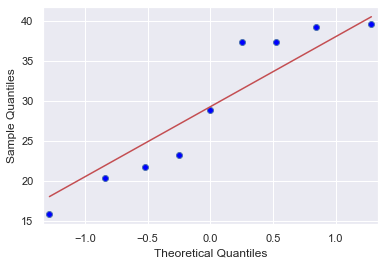

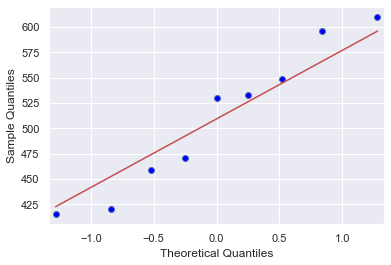

In [152]:
for i in qqc:
    qqplot_data = qqplot(df[i],dist=stats.norm, line='s').gca().lines

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



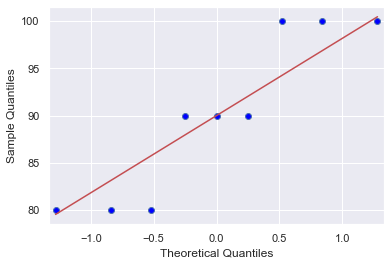

In [153]:

qqplot_data = qqplot(df.ca, line='s').gca().lines

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



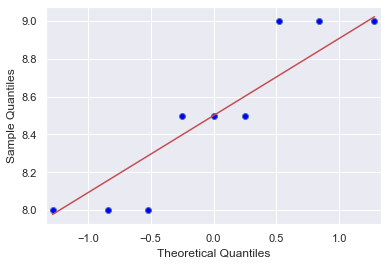

In [154]:

qqplot_data = qqplot(df.ts, line='s').gca().lines

In [155]:
#qqplot_data = qqplot(df.ce, line='s').gca().lines

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



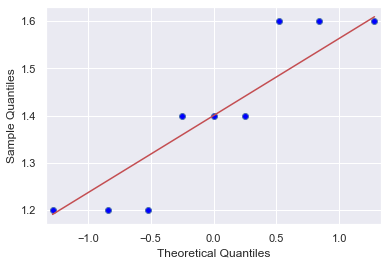

In [156]:
qqplot_data = qqplot(df.fd, line='s').gca().lines

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



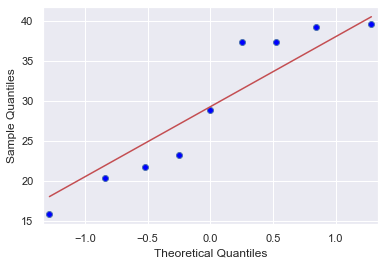

In [157]:
qqplot_data = qqplot(df.pe, line='s').gca().lines

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



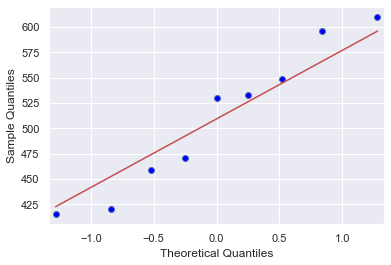

In [158]:
qqplot_data = qqplot(df.tsm, line='s').gca().lines

((array([-1.44573845, -0.91666807, -0.56381839, -0.2709378 ,  0.        ,
          0.2709378 ,  0.56381839,  0.91666807,  1.44573845]),
  array([415, 420, 459, 471, 530, 533, 549, 596, 610], dtype=int64)),
 (76.8866031218249, 509.22222222222223, 0.9776721374974052))

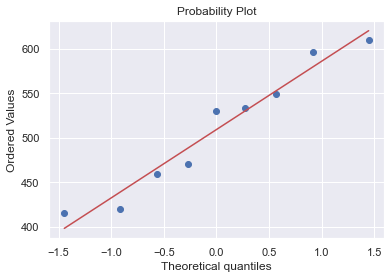

In [159]:
# q-q plot. 
import scipy.stats as stats
import pylab
df.columns
x=df.tsm # by changing tsm to other variables we will get qq plot of all others
stats.probplot(x, dist='norm',plot=pylab)

((array([-1.44573845, -0.91666807, -0.56381839, -0.2709378 ,  0.        ,
          0.2709378 ,  0.56381839,  0.91666807,  1.44573845]),
  array([8. , 8. , 8. , 8.5, 8.5, 8.5, 9. , 9. , 9. ])),
 (0.4404658769419948, 8.5, 0.9269671763349487))

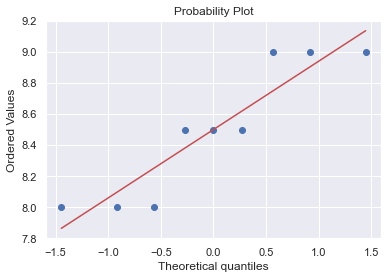

In [160]:
#by changing the variable in the bracket, we will get different plots
x=df['ts']
stats.probplot(x, dist='norm',plot=pylab)
   


((array([-1.44573845, -0.91666807, -0.56381839, -0.2709378 ,  0.        ,
          0.2709378 ,  0.56381839,  0.91666807,  1.44573845]),
  array([0.11111111, 0.11111111, 0.11111111, 0.11764706, 0.11764706,
         0.11764706, 0.125     , 0.125     , 0.125     ])),
 (0.006117581624194375, 0.11791938997821351, 0.9264330551864052))

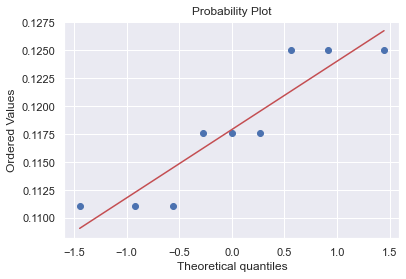

In [161]:
 stats.probplot(1/x, dist='norm',plot=pylab)
   

((array([-1.44573845, -0.91666807, -0.56381839, -0.2709378 ,  0.        ,
          0.2709378 ,  0.56381839,  0.91666807,  1.44573845]),
  array([2.07944154, 2.07944154, 2.07944154, 2.14006616, 2.14006616,
         2.14006616, 2.19722458, 2.19722458, 2.19722458])),
 (0.051879408089279336, 2.138910760837442, 0.9268334050693614))

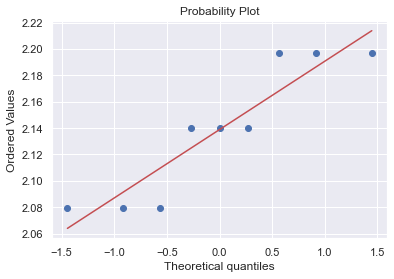

In [162]:
 stats.probplot(np.log(x), dist='norm',plot=pylab)
    

((array([-1.44573845, -0.91666807, -0.56381839, -0.2709378 ,  0.        ,
          0.2709378 ,  0.56381839,  0.91666807,  1.44573845]),
  array([64.  , 64.  , 64.  , 72.25, 72.25, 72.25, 81.  , 81.  , 81.  ])),
 (7.487919908013912, 72.41666666666667, 0.9268335594439722))

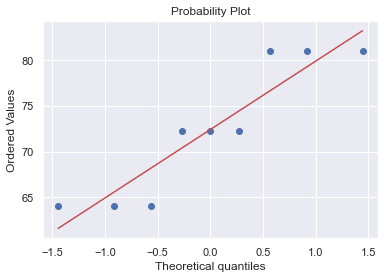

In [163]:
stats.probplot(x*x, dist='norm',plot=pylab)
    #x=x itself is better

In [164]:
#since there is no requirement of changing variable to other form, so following operations not required
"""y=np.log(x)
df1=pd.DataFrame(y)
df['Rape']=df1['Rape']
df"""


"y=np.log(x)\ndf1=pd.DataFrame(y)\ndf['Rape']=df1['Rape']\ndf"

((array([-1.44573845, -0.91666807, -0.56381839, -0.2709378 ,  0.        ,
          0.2709378 ,  0.56381839,  0.91666807,  1.44573845]),
  array([415, 420, 459, 471, 530, 533, 549, 596, 610], dtype=int64)),
 (76.8866031218249, 509.22222222222223, 0.9776721374974052))

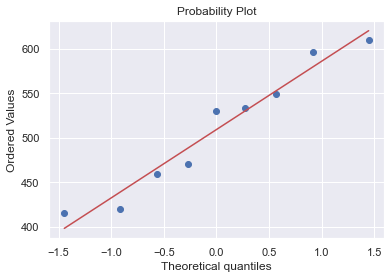

In [165]:
from scipy import stats
import seaborn as sns
stats.probplot(df.tsm, plot=sns.mpl.pyplot)

In [166]:
df.columns

Index(['fm', 'ca', 'ts', 'ce', 'fd', 'rvi', 'pe', 'tsm'], dtype='object')

In [167]:
#normalisation
def norm_fn(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

df_norm=norm_fn(df.iloc[:,[1,2,4,6,7]])

In [168]:
#now to verify
df1=df_norm.describe()
 #if we assign like this to df1
df1

,ca,ts,fd,pe,tsm
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.500000,0.500000,0.500000,0.565717,0.483191
std,0.433013,0.433013,0.433013,0.390755,0.367515
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.246497,0.225641
50%,0.500000,0.500000,0.500000,0.545683,0.589744
75%,1.000000,1.000000,1.000000,0.906620,0.687179
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [169]:
df1.columns

Index(['ca', 'ts', 'fd', 'pe', 'tsm'], dtype='object')

In [170]:
df

,fm,ca,ts,ce,fd,rvi,pe,tsm
0,304,80,8.0,18.8,1.2,No Defects,23.228,420
1,304,90,8.5,18.8,1.4,No Defects,39.216,549
2,304,100,9.0,18.8,1.6,No Defects,37.384,610
3,316L,80,8.5,20.361,1.6,No Defects,15.772,415
4,316L,90,9.0,20.361,1.2,No Defects,39.610,596
5,316L,100,8.0,20.361,1.4,Excessive Deposition,21.648,471
6,309L,80,9.0,24.9,1.4,Lack Of Fusion Of Hsla Steel,28.780,530
7,309L,90,8.0,24.9,1.6,No Defects,37.356,533
8,309L,100,8.5,24.9,1.2,No Defects,20.324,459


In [171]:
df_norm

,ca,ts,fd,pe,tsm
0,0.0,0.0,0.0,0.312778,0.025641
1,0.5,0.5,0.5,0.983472,0.687179
2,1.0,1.0,1.0,0.906620,1.000000
3,0.0,0.5,1.0,0.000000,0.000000
4,0.5,1.0,0.0,1.000000,0.928205
5,1.0,0.0,0.5,0.246497,0.287179
6,0.0,1.0,0.5,0.545683,0.589744
7,0.5,0.0,1.0,0.905445,0.605128
8,1.0,0.5,0.0,0.190956,0.225641


In [172]:
df[['ca', 'ts', 'fd', 'pe', 'tsm']] = df_norm[['ca', 'ts', 'fd', 'pe', 'tsm']]

In [173]:
df

,fm,ca,ts,ce,fd,rvi,pe,tsm
0,304,0.0,0.0,18.8,0.0,No Defects,0.312778,0.025641
1,304,0.5,0.5,18.8,0.5,No Defects,0.983472,0.687179
2,304,1.0,1.0,18.8,1.0,No Defects,0.906620,1.000000
3,316L,0.0,0.5,20.361,1.0,No Defects,0.000000,0.000000
4,316L,0.5,1.0,20.361,0.0,No Defects,1.000000,0.928205
5,316L,1.0,0.0,20.361,0.5,Excessive Deposition,0.246497,0.287179
6,309L,0.0,1.0,24.9,0.5,Lack Of Fusion Of Hsla Steel,0.545683,0.589744
7,309L,0.5,0.0,24.9,1.0,No Defects,0.905445,0.605128
8,309L,1.0,0.5,24.9,0.0,No Defects,0.190956,0.225641


# 2.bivariate analysis

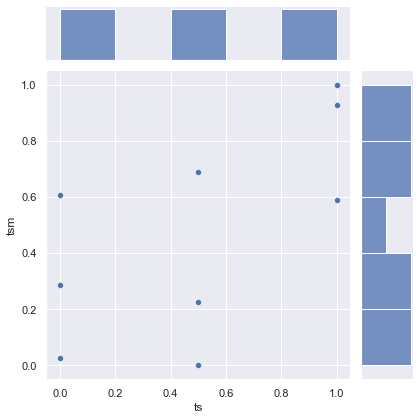

In [174]:
# Jointplot
import seaborn as sns
sns.jointplot(x=df['ts'], y=df['tsm'])

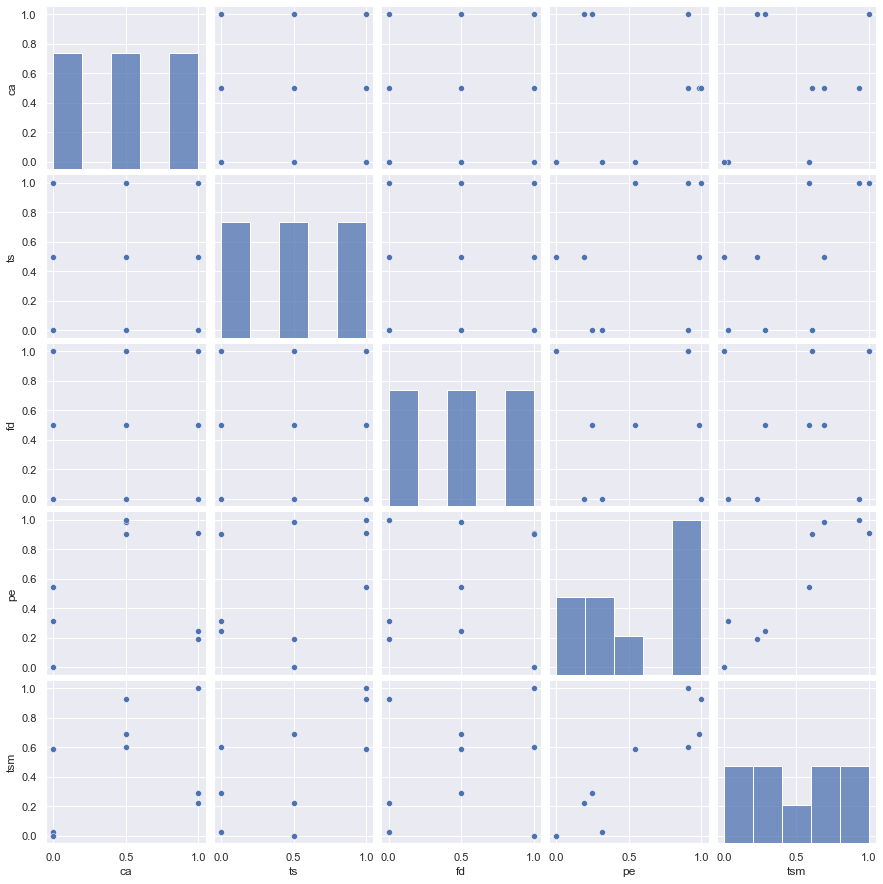

In [175]:
##### Scatter plots between the variables along with histograms
import seaborn as sns
sns.pairplot(df.iloc[:, :])

In [176]:
#### Correlation matrix
df.corr()

,ca,ts,fd,pe,tsm
ca,1.000000e+00,3.700743e-17,-3.700743e-17,0.179376,0.352458
ts,3.700743e-17,1.000000e+00,3.700743e-17,0.364795,0.628382
fd,-3.700743e-17,3.700743e-17,1.000000e+00,0.113892,0.167166
pe,1.793759e-01,3.647950e-01,1.138919e-01,1.000000,0.907089
tsm,3.524579e-01,6.283821e-01,1.671658e-01,0.907089,1.000000


<AxesSubplot:>

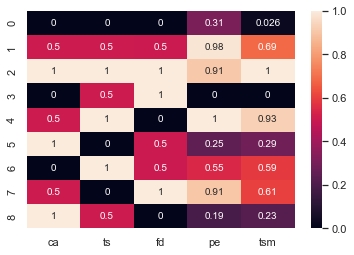

In [177]:
#heat map
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline


sns.heatmap(df[['ca', 'ts', 'fd', 'pe', 'tsm']], annot=True)

In [178]:
pf=ProfileReport(df)

In [179]:
pf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [180]:
df = pd.get_dummies(df,drop_first=True)

In [182]:
df

,ca,ts,fd,pe,tsm,fm_309L,fm_316L,ce_24.9,ce_ 20.361,rvi_Lack Of Fusion Of Hsla Steel,rvi_No Defects
0,0.0,0.0,0.0,0.312778,0.025641,0,0,0,0,0,1
1,0.5,0.5,0.5,0.983472,0.687179,0,0,0,0,0,1
2,1.0,1.0,1.0,0.906620,1.000000,0,0,0,0,0,1
3,0.0,0.5,1.0,0.000000,0.000000,0,1,0,1,0,1
4,0.5,1.0,0.0,1.000000,0.928205,0,1,0,1,0,1
5,1.0,0.0,0.5,0.246497,0.287179,0,1,0,1,0,0
6,0.0,1.0,0.5,0.545683,0.589744,1,0,1,0,1,0
7,0.5,0.0,1.0,0.905445,0.605128,1,0,1,0,0,1
8,1.0,0.5,0.0,0.190956,0.225641,1,0,1,0,0,1


In [193]:
df.columns =['ca', 'ts', 'fd', 'pe', 'tsm', 'fm_309L', 'fm_316L', 'ce_24_9','ce_20_361', 'rvi_Lack_Of_Fusion_Of_Hsla_Steel', 'rvi_No_Defects']

In [183]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

# Model building

In [ ]:
"""5.	Model Building
5.1	Build the model on the scaled data (try multiple options)
5.2	Perform Multi linear regression model and check for VIF, AvPlots, Influence Index Plots.
5.3	Train and Test the data and compare RMSE values tabulate R-Squared values , RMSE for different models in documentation and model_dfvide your explanation on it.
5.4	Briefly explain the model output in the documentation. 
"""

In [191]:
df.columns

Index(['ca', 'ts', 'fd', 'pe', 'tsm', 'fm_309L', 'fm_316L', 'ce_24.9',
       'ce_20.361', 'rvi_Lack_Of_Fusion_Of_Hsla_Steel', 'rvi_No_Defects'],
      dtype='object')

In [200]:
y = df['tsm']
X =df.drop(columns = ['tsm'])
X1=X.to_numpy()

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X1

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [203]:
vif

,VIF,Features
0,4.085917,ca
1,6.874024,ts
2,1.019136,fd
3,1.475247,pe
4,inf,fm_309L
5,inf,fm_316L
6,inf,ce_24_9
7,inf,ce_20_361
8,6.795663,rvi_Lack_Of_Fusion_Of_Hsla_Steel
9,7.450521,rvi_No_Defects


In [194]:
#### preparing model consideration of all the variables
import statsmodels.formula.api as smf

ml1 = smf.ols('tsm ~ ca+ts+fd+pe+fm_309L+fm_316L+ce_24_9+ce_20_361+rvi_Lack_Of_Fusion_Of_Hsla_Steel+rvi_No_Defects',data= df).fit() #### regression model

#### Summary
ml1.summary()

#### Here p-values for price,cd_yes,multi_yes and premium_yes are low

C:\Users\hp\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tsm   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     21.14
Date:                Sun, 06 Mar 2022   Prob (F-statistic):              0.166
Time:                        19:34:32   Log-Likelihood:                 19.285
No. Observations:                   9   AIC:                            -22.57
Df Residuals:                       1   BIC:                            -20.99
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -0.1459      0.089     -1.639      0.349      -1.277       0.985
ca                                   0.1829      0.066      2.765      0.221      -0.658       1.023
ts                                   0.2914      0.076      3.840      0.162      -0.673       1.256
fd                                   0.0669      0.070      0.953      0.515      -0.825       0.959
pe                                   0.7294      0.094      7.793      0.081      -0.460       1.919
fm_309L                              0.0037      0.040      0.092      0.941      -0.500       0.507
fm_316L                              0.0185      0.037      0.498      0.706      -0.453       0.490
ce_24_9                              0.0037      0.040      0.092      0.941      -0.500       0.507
ce_20_361                            0.0185      0.037      0.498      0.706      -0.453       0.490
rvi_Lack_Of_Fusion_Of_Hsla_Steel     0.0054      0.052      0.105      0.934      -0.655       0.666
rvi_No_Defects                      -0.0894      0.057     -1.567      0.362      -0.814       0.635
==============================================================================
Omnibus:                        5.203   Durbin-Watson:                   3.249
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                1.696
Skew:                          -1.024   Prob(JB):                        0.428
Kurtosis:                       3.573   Cond. No.                     1.56e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
[3] The smallest eigenvalue is 1.19e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""